Import libraries

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Find data correlation and get data head.

In [155]:
import os

path=os.path.join(os.path.dirname(os.getcwd()), 'data', 'Walmart_Sales.csv')
sales_data=pd.read_csv(path)
sales_data["Date"]=pd.to_datetime(sales_data["Date"],format='%d-%m-%Y')
sales_data.groupby(sales_data['Date'].dt.to_period('M'))['Weekly_Sales'].sum().reset_index()

matrix=sales_data[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']].corr()
print(matrix)

print()

print(sales_data.head())
X = sales_data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = sales_data['Weekly_Sales']

              Weekly_Sales  Temperature  Fuel_Price       CPI  Unemployment
Weekly_Sales      1.000000    -0.063810    0.009464 -0.072634     -0.106176
Temperature      -0.063810     1.000000    0.144982  0.176888      0.101158
Fuel_Price        0.009464     0.144982    1.000000 -0.170642     -0.034684
CPI              -0.072634     0.176888   -0.170642  1.000000     -0.302020
Unemployment     -0.106176     0.101158   -0.034684 -0.302020      1.000000

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.10

Create and train LinearRegression model

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Display analysis for model and coefficients

In [76]:
print("Average value: ", sales_data['Weekly_Sales'].mean())
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", mse**0.5)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)

Average value:  1046964.8775617715
Mean Squared Error: 316554511405.115
Root Mean Squared Error: 562631.7724810028

Coefficients:
               Coefficient
Holiday_Flag  85575.747224
Temperature    -503.229762
Fuel_Price   -20058.290544
CPI           -1646.712769
Unemployment -43843.105508


I find it interesting Fuel_Price has a negative coefficient while it has a positive correlation, but I don't know how to explain it. As for the goodness of fit for the model the Mean Squared Error is extremely large, so I will get R2 value for further analysis

In [77]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

R2: 0.01738312550370069


The low R2 value means that there is a very bad fit for the model. Next ill make a QQ-plot to visualize

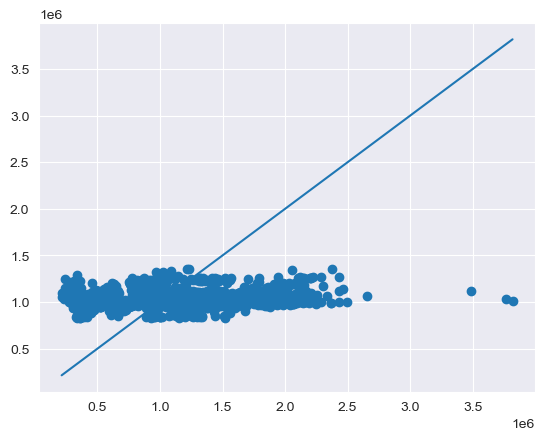

In [78]:
import matplotlib.pyplot as plt
plt.scatter(y=y_pred, x=y_test)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)])

The QQ plot shows that there is almost no adjustment in the prediction based off of the data

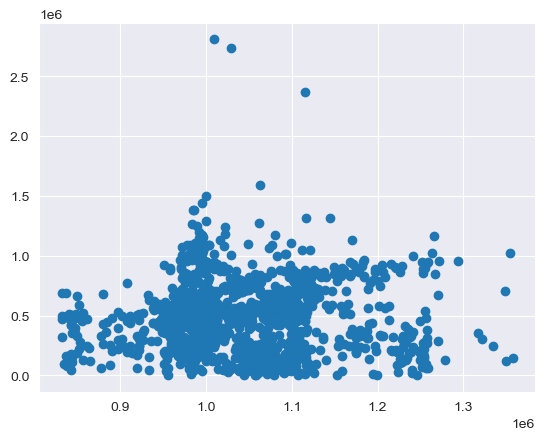

In [79]:
plt.scatter(y=abs(y_test-y_pred), x=y_pred)

Neext I will check if any of the predictor values have a good fit with the data

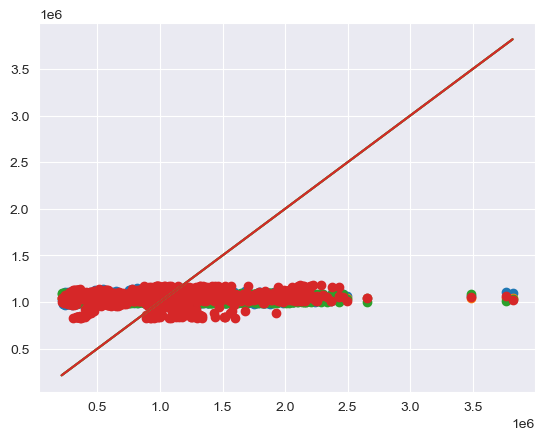

In [80]:
y=sales_data["Weekly_Sales"]
for X in map(lambda x: sales_data[[x]],['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    plt.scatter(y=y_pred, x=y_test)
    plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)])

The above graph shows that there is next to no linear relationship between the different types of data

In [92]:
import statsmodels.api as sm

X = sales_data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
X=sm.add_constant(X)
y = sales_data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y, X)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     33.57
Date:                Fri, 23 May 2025   Prob (F-statistic):           5.93e-34
Time:                        16:04:19   Log-Likelihood:                -94269.
No. Observations:                6435   AIC:                         1.886e+05
Df Residuals:                    6429   BIC:                         1.886e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.727e+06   7.98e+04     21.646      0.000    1.57e+06    1.88e+06
Holiday_Flag  7.489e+04   2.76e+04      2.710      0.007    2.07e+04    1.29e+05
Temperature   -724.1715    400.461     -1.808      0.071   -1509.207      60.864
Fuel_Price   -1.017e+04   1.58e+04     -0.645      0.519   -4.11e+04    2.07e+04
CPI          -1598.8717    195.127     -8.194      0.000   -1981.385   -1216.358
Unemployment -4.155e+04   3972.660    -10.460      0.000   -4.93e+04   -3.38e+04
==============================================================================
Omnibus:                      365.109   Durbin-Watson:                   0.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.212
Skew:                           0.633   Prob(JB):                     3.81e-94
Kurtosis:                       3.007   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I made A Ordinary Least Squares model to show key analysis data. But later am realizing it isn't very helpful due to the data not being linear

Now I am going to make A polynomial model and get the OLS to see what values I should remove

In [121]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X=sales_data[['Store', 'Fuel_Price', 'CPI', 'Unemployment']]
y=sales_data['Weekly_Sales']

poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X)

feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Add constant term for intercept
X_poly_df = sm.add_constant(X_poly_df)

# Fit the model with statsmodels
model = sm.OLS(y, X_poly_df).fit()

# View the summary with p-values
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     90.88
Date:                Fri, 23 May 2025   Prob (F-statistic):               0.00
Time:                        16:27:23   Log-Likelihood:                -91302.
No. Observations:                6435   AIC:                         1.828e+05
Df Residuals:                    6324   BIC:                         1.836e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

I discovered that Holiday_Flag and Temperature typically have a high p value; so I decided to remove them

Next I am going to run a while loop to increase the polynomial degree until the new MSE is less than 5% less than the old MSE

Average value:  1046964.8775617715
Mean Squared Error: 139887817006.85806
Root Mean Squared Error: 374015.7978038602
R2: 0.5657742203159513


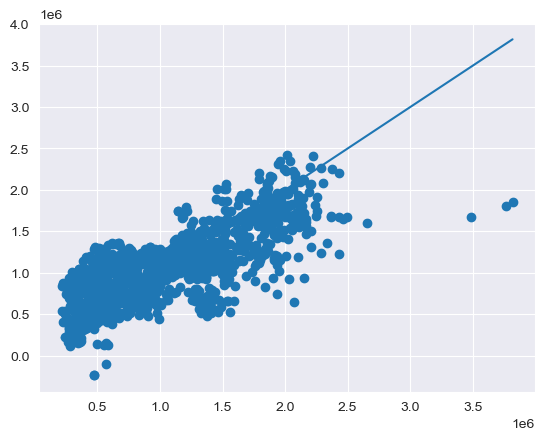

In [145]:
X=sales_data[['Store', 'Fuel_Price', 'CPI', 'Unemployment']]
y=sales_data['Weekly_Sales']

best_model=None
best_MSE=float('inf')
i=2
while True:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    if ((MSE/best_MSE)*100) <= 95:
        best_model = model
        best_MSE=MSE
    else:
        break
    i+=1

print("Average value: ", sales_data['Weekly_Sales'].mean())
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", mse**0.5)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

plt.scatter(y=y_pred, x=y_test)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)])

After creating the polynomial model I have a much better model with over 50% of the variation explained. Although I can explain a large amount of variance I can't explain enough to deem this model good for use

I decided to make a RandomForestRegressor and find the best variables for the model

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': range(100,600,100),
    'max_depth': [None, range(10,60,10)],
    'min_samples_split': range(1,25,5),
    'min_samples_leaf': range(1,10,2),
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,  # how many combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='r2',  # or 'neg_mean_squared_error', etc.
    random_state=42,
    n_jobs=-1   # use all cores
)
random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

C:\Users\Josiah\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
115 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Josiah\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Josiah\miniconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Josiah\miniconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Josiah\miniconda3\Lib\s

Best Parameters: {'n_estimators': 300, 'min_samples_split': 16, 'min_samples_leaf': 5, 'max_depth': None}
Best Score: 0.2819079943973444


I recieved A error that removes a lot of the data, but it didn't seem to cause a significant problem.

In [154]:
X = sales_data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = sales_data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=300, max_depth=None, min_samples_leaf=5, min_samples_split=16, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred)**0.5)
print("R²:", r2_score(y_test, y_pred))

MSE: 225547451949.8009
RMSE:  474918.3634581852
R²: 0.29987814325638296


Using a model with the expected best model variables I got almost 30% of the variance explained, but still worse results than the polynomial model

Overall there does not appear to be enough data for A accurate predictor model. I suggest either more exploration in types of data, or giving up on predicting the specific data.